# Practicum 1: oscilloscoop

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import sympy as sp
from IPython.display import display
sp.init_printing()

### Definieer de symbolen, functies, en bereken partiële afgeleiden

In [2]:
# Definieer symbolen
R = sp.symbols('R')
L = sp.symbols('L')
C = sp.symbols('C')

sr = sp.symbols('sr')
sl = sp.symbols('sl')
sc = sp.symbols('sc')

# Definieer de twee functies
dempingsfactor = R/(2*L)
resfreq = 1/sp.sqrt(L*C)

In [3]:
# Partiële afgeleiden:

dempingdiffr = sp.diff(dempingsfactor, R)
dempingdiffl = sp.diff(dempingsfactor, L)

freqdiffl = sp.diff(resfreq, L)
freqdiffc = sp.diff(resfreq, C)

### Definieer de vergelijkingen voor de fouten

In [4]:
sdemping = sp.sqrt( dempingdiffr**2 * sr**2 + dempingdiffl**2 * sl**2 )
sfreq = sp.sqrt( freqdiffl**2 * sl**2 + freqdiffc**2 * sc**2 )

### Specifieke waarden van oefening 3 en 4:

In [5]:
rval = 100
lval = 2.2*10**-3
cval = 10**-5

deltar = rval/(20)   # delta is delen door 20, dan nog eens delen soort sqrt(12) voor de s
deltal = lval/(20)
deltac = cval/(20)

In [6]:
# Afronden van de hierboven bekomen waardes op juiste aantal BC

def round_sf(number, significant):
    return round(number, significant - len(str(number)))

# DEZE FUNCTIE WERKT NIET DEFTIG DUS NIET GEBRUIKEN

In [7]:
display(deltar)
display(deltal)
display(deltac)

In [8]:
# Afronden na de eerste bewerking


deltal = 2*10**-4
deltac = 5*10**-7

In [9]:
# Delen door wortel 12

wortel = np.sqrt(12)

srval = deltar/wortel
slval = deltal/wortel
scval = deltac/wortel

In [10]:
display(srval)
display(slval)
display(scval)


In [11]:
# Zelf afronden op resp. 2, 1, 2 BC:
srval = 0.14
slval = 6*10**-5
scval = 1.4*10**-7

### Resultaten:

In [12]:
resultaatdemping = sdemping.subs({L:lval, R:rval, sr:srval, sl:slval})
resultaatfreq = sfreq.subs({sl:slval, sc:scval, C:cval, L:lval})

In [13]:
display(resultaatdemping)

In [14]:
display(resultaatfreq)

# Voor het practicum zelf

### Metingen van oefening 3:

In [15]:
# Berekenen van de onzekerheiden op de frequenties die berekend zijn
# Eerste 5 metingen: frequentie signaal 

onzekerheidtijd = 0.5 *10**-6
tijden = [36 *10**-6, 35 *10**-6, 39 *10**-6, 35 *10**-6, 37 *10**-6]

In [16]:
for time in tijden: # Formule: wortel van: product van: (partiele afgeleide)^2 en (systematische fout gedeeld door sqrt(12))^2
    display(time**(-2) * onzekerheidtijd/np.sqrt(12)) # wortel valt weg tegen kwadraten (product)

### Metingen van oefening 4 - data onder 'oscilloscoop'

In [17]:
tijden2 = [42 *10**-6, 48 *10**-6, 34 *10**-6, 36 *10**-6]
onzekerheidtijd2 = 1 *10**-6

In [18]:
# ONZEKERHEID OP DE FREQUENTIES VAN METINGEN VRAAG 4
for time in tijden2:
    display(time**-2 * onzekerheidtijd2/np.sqrt(12))

In [19]:
# Onzekerheid van faseverschillen voor oefening 4

oawaarden1 = [0.6, 2, 1.6, 1.8, 1.6, 2, 2, 1.2, 0]
obwaarden1 = [0.6, 3, 3.2, 2.4, 1.8, 3, 2.2, 3.2, 3.4]

onzekerheidoa1 = 0.1
onzekerheidob1 = onzekerheidoa1

oawaarden2 = [1, 1.7]
obwaarden2 = [1.10, 1.9]
onzekerheidoa2 = 0.05
onzekerheidob2 = onzekerheidoa2

onzekerfase1 = []
onzekerfase2 = []

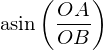

In [20]:
OA = sp.symbols('OA')
OB = sp.symbols('OB')
fase = sp.asin(OA/OB)

display(fase)

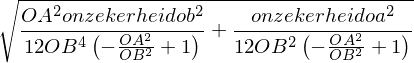

In [21]:
onzekerheidoa = sp.symbols('onzekerheidoa')
onzekerheidob = sp.symbols('onzekerheidob')
sfase = sp.sqrt( sp.diff(fase, OA)**2 * onzekerheidoa**2 /12 + sp.diff(fase, OB)**2 * onzekerheidob**2 / 12)
display(sfase)

In [22]:
for i in range(len(oawaarden1)):
    onzekerfase1.append(sfase.subs({OA:oawaarden1[i], OB:obwaarden1[i], onzekerheidoa:onzekerheidoa1, onzekerheidob:onzekerheidob1}))

In [23]:
for i in range(len(oawaarden2)):
    onzekerfase2.append(sfase.subs({OA:oawaarden2[i], OB:obwaarden2[i], onzekerheidoa:onzekerheidoa2, onzekerheidob:onzekerheidob2}))

In [24]:
print(onzekerfase1)
# LET OP: eerste is nan omdat OA=OB dus wordt gedeeld door nul, laatste is maal wortel drie

[nan, 0.0155158222708544, 0.0116461873828114, 0.0227310302329159, 0.0468377918572847, 0.0155158222708544, 0.0425670139378726, 0.0103929654603778, 0.00490196078431373*sqrt(3)]


In [25]:
print(onzekerfase2)

[0.0425670139378726, 0.0228252850818655]


In [26]:
phikes = []
for i in range(len(oawaarden1)):
    phikes.append(sp.asin(oawaarden1[i]/obwaarden1[i]))

In [27]:
phikes2 = []
for i in range(len(oawaarden2)):
    phikes2.append(sp.asin(oawaarden2[i]/obwaarden2[i]))

In [28]:
phikes

In [29]:
phikes2

## NOG TE DOEN: metingen van OA en OB en daaruit faseverschil van oef 4

### Metingen van oefening 5

Verduidelijking van de gebruikte variabelen: de 6 metingen die hier zijn genomen zijn opgesplitst in twee datasets van beide lengte 3. Dit omdat hun systematische onzekerheden/fouten verschillen. Tijden3 en onzekerheidtijd3 horen samen, idem met 4. 

Daarnaast hebben we waarden voor d gemeten. Deze starten met index vanaf 1: dus we hebben dwaarden1 en dwaarden2. Beide ook andere onzekerheid: onzekerheidd1 en onzekerheidd2.

Daarna bereken ik phiwaarden maar die had ik uiteindelijk niet nodig dus fuck mijn leven, moeite gedaan voor niks;

Dan definieer ik de gebruikte formule voor phi symbolisch en bepaal ik afgeleiden: phidifft en phidiffd respectievelijk. De formule sphi is dan de formule voor de onzekerheid op phi (eerst symbolisch gedefinieerd). Dan bepalen van fouten voor beide datasets dus met twee berekeningen.

In [30]:
tijden3 = [116 *10**-6, 72 *10**-6, 48 *10**-6]
tijden4 = [36*10**-6, 32 *10**-6, 26 *10**-6]

onzekerheidtijd3 = 2*10**-6
onzekerheidtijd4 = 1*10**-6

In [31]:
dwaarden1 = [28 *10**-6, 16 *10**-6, 8 *10**-6]
dwaarden2 = [0, 4 *10**-6, 6*10**-6]

onzekerheidd1 = 2*10**-6
onzekerheidd2 = 1*10**-6

In [32]:
# Berekenen van alle phiwaarden: UITEINDELIJK NIET GEBRUIKT!!!!


phiwaarden1 = []  # voor de eerste 3 datapunten

for i in range(len(tijden3)):
    phiwaarden1.append( 2*np.pi*(dwaarden1[i]/tijden3[i]))
    
# dit is de formule uit de voorbereidingsopgave

In [33]:
# Voor de andere drie datapunten: 

phiwaarden2=[]

for i in range(len(tijden4)):
    phiwaarden2.append( 2*np.pi*(dwaarden2[i]/tijden4[i]))


#### (De lijsten phiwaarden1 en phiwaarden2 bevatten de faseverschillen van oef 5)

In [34]:
print(phiwaarden1)   # zelfde waarden als Seppe berekend had tijdens pract

[1.5166309362157622, 1.3962634015954636, 1.0471975511965976]


In [35]:
print(phiwaarden2)   # zelfde waarden als Seppe berekend had tijdens pract

[0.0, 0.7853981633974483, 1.4499658401183662]


In [58]:
freqvalues = [1 * 10**4, 1.5 * 10**4, 2 * 10**4, 2.5 * 10**4, 3 * 10**4, 3.5 * 10**4, 4 * 10**4, 2.4 * 10**4, 2.1 * 10**4, 2.9 * 10**4, 2.8 * 10**4]
phivalues = [1.60, 1.14, 1.11, 0.73, 0.52, 0.85, 1.10, 0.73, 1.40, 0.38, 0]



### Bepalen van onzekerheden op de phiwaarden

In [36]:
d = sp.symbols('d')           # Definiëren van nieuwe symbolen
t = sp.symbols('t')

phi = 2*np.pi*(d/t)           # Formule uit de voorbereiding

phidifft = sp.diff(phi, t)    # Afleiden van de formule
phidiffd = sp.diff(phi, d)

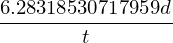

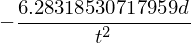

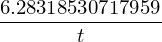

In [37]:
display(phi)
display(phidifft)
display(phidiffd)
# zijn correct

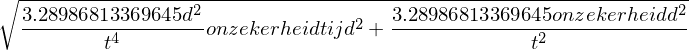

In [38]:
onzekerheidtijd = sp.symbols('onzekerheidtijd')
onzekerheidd = sp.symbols('onzekerheidd')

sphi = sp.sqrt(phidifft**2 * (onzekerheidtijd**2)/12 + phidiffd**2 * (onzekerheidd**2)/12 )
display(sphi)
# Algemene uitdrukking, nu invullen voor beide sets datapunten (herinner: beide lengte 3)

In [39]:
# EERSTE DATASET

onzekerhedenphi1 = []
sphi1 = sphi.subs({onzekerheidtijd:onzekerheidtijd3, onzekerheidd: onzekerheidd1})

for i in range(len(tijden3)):
    onzekerhedenphi1.append(sphi1.subs({t:tijden3[i], d:dwaarden1[i]}))

In [40]:
# TWEEDE DATASET

onzekerhedenphi2 = []
sphi2 = sphi.subs({onzekerheidtijd:onzekerheidtijd4, onzekerheidd: onzekerheidd2})

for i in range(len(tijden4)):
    onzekerhedenphi2.append(sphi2.subs({t:tijden4[i], d:dwaarden2[i]}))

## De gevonden onzekerheden voor phiwaarden van oef 5 zijn dan: 

In [41]:
print(onzekerhedenphi1)   # eerste dataset

[0.0321705330637854, 0.0516123576394041, 0.0766174361822405]


In [42]:
print(onzekerhedenphi2)   # tweede dataset

[0.0503833156731727, 0.0571223358521731, 0.0715949757317718]


In [ ]:
d = sp.symbols('d')
t = sp.symbols('t')

In [44]:
rval = 100
lval = 2.2*10**-3
cval = 10**-5

def phi(omega, l=1, r=1, c=1):
    return np.arctan((omega*l-1/(omega*c))/r)

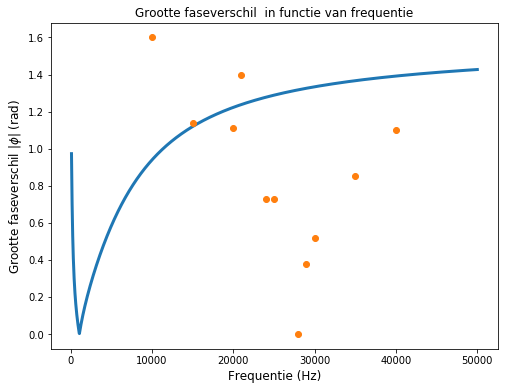

In [59]:
# berekenen theoretische resonantiefrequentie

f0 = 1/(np.sqrt(lval*cval)*2*np.pi)

# theoretische curve tussen f0/4 en f0*2
freq = np.linspace(f0/10, 50000, 2000)
phi_theoretisch = phi(2*np.pi*freq, lval, rval, cval)

# plotten theoretische curve en metingen
fig, ax = plt.subplots(1,1, figsize=(8, 6))

ax.plot((freq), abs(phi_theoretisch), linewidth=3, label = 'Theoretische curve')
ax.plot(freqvalues, phivalues, 'o', label = 'Datapunten')



# lay-out en labels
ax.set_xlabel('Frequentie (Hz)', size=12)
ax.set_ylabel('Grootte faseverschil $| \phi |$ (rad)', size=12)

plt.title('Grootte faseverschil  in functie van frequentie')

plt.show()

fig.savefig('theorie_data.pdf')